# Распознавание цифровых изображений

### Импорты библиотек

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from re import X
from keras.api.layers import Dense, Flatten
from keras.api.models import Sequential
from keras.api.datasets import mnist
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

### Визуализация изображения

9


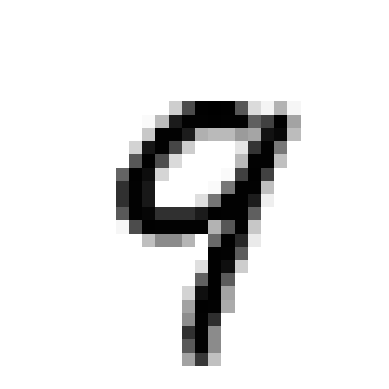

In [ ]:
# Загружаем данные из набора MNIST
# X_train и y_train - обучающая выборка (изображения и метки)
# X_test и y_test - тестовая выборка (изображения и метки)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Отображаем 12-е изображение из тестовой выборки
# Используем черно-белую цветовую схему для отображения
plt.imshow(X_test[12], cmap='binary')
# Отключаем отображение осей графика
plt.axis('off')
# Выводим метку (правильный ответ) для 12-го изображения из тестовой выборки
print(y_test[12])



In [ ]:
y = y_train #A
n_samples = len(X_train) #B
# Изменяем форму массива X_train, чтобы каждый образец стал одномерным вектором
X= X_train.reshape((n_samples, -1)) #B

In [ ]:
# Разделяем данные на обучающую и тестовую выборки
# X - это массив признаков (изображения), y - это массив меток (цифры)
# random_state=0 устанавливает начальное значение генератора случайных чисел для воспроизводимости
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state=0) #C

### Создаем и обучаем модель

In [ ]:
gnb = GaussianNB()#D
# Обучаем модель на обучающей выборке
fit = gnb.fit(X_train_2,y_train_2)#E
# Используем обученную модель для предсказания меток на тестовой выборке
# predicted будет содержать предсказанные метки для X_test_2
predicted = fit.predict(X_test_2)#F

### Визуализация предсказаний

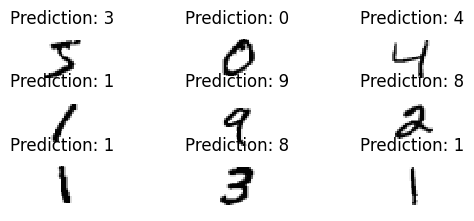

In [ ]:
# Объединяем изображения и их предсказания в список кортежей
# fit.predict(X) возвращает предсказания для всех образцов в X
images_and_predictions = list(zip(X_train, fit.predict(X)))#A
for index, (image, prediction) in enumerate(images_and_predictions[:9:1]):#B
    # Создаем подграфик для каждого изображения
    plt.subplot(6, 3 ,index +1)#C
    plt.axis('off')#D
    plt.imshow(image, cmap='binary', interpolation='nearest')#E
    plt.title('Prediction: %i' % prediction)#f
plt.show()#G

# Качество вина

### Импорты

In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pylab as plt
from sklearn import preprocessing

### Данные взяты из онлайн-архива набора данных машинного обучения

In [6]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/refs/heads/master/winequality-red.csv' #A
data = pd.read_csv(url, sep=',')#B

## Чистка данных

In [10]:
X = data[[u'fixed acidity', u'volatile acidity', u'citric acid',
      u'residual sugar', u'chlorides', u'free sulfur dioxide',
      u'total sulfur dioxide', u'density', u'pH', u'sulphates']] #C
y = data.quality #D

### Разделяем набор данных на независимые (X) и зависимые (y) переменные.

### Стандартизация переменных

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X) #E

## Исследование данных

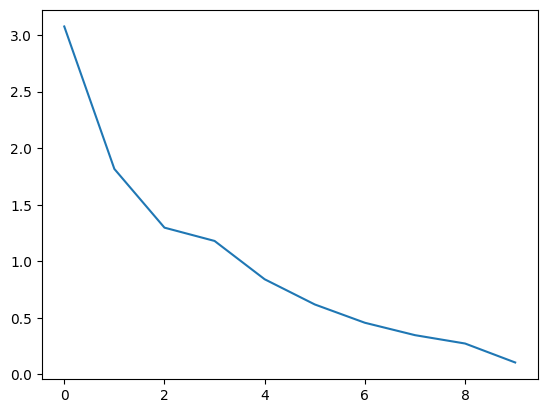

In [12]:
model = PCA() #A
results = model.fit(X) #B
Z = results.transform(X) #C
plt.plot(results.explained_variance_) #D
plt.show() #E

In [13]:
print(results.components_)

[[ 0.49403821 -0.25897378  0.47856211  0.14536183  0.20289297 -0.04565916
   0.00798766  0.37575558 -0.43650973  0.25230926]
 [-0.1156371   0.10586668 -0.03305056  0.34173742  0.10610982  0.63710033
   0.64988577  0.11374942  0.01651706  0.06945586]
 [ 0.22167662  0.53452724 -0.19003061  0.37455245 -0.10962276 -0.18500863
  -0.09030003  0.48072571 -0.02931052 -0.44987019]
 [-0.14080607  0.42712997 -0.19202258 -0.09935418  0.73659447 -0.14323223
  -0.09033617  0.07777213  0.00713343  0.4167047 ]
 [-0.21517894 -0.28768001  0.03225827  0.70408961 -0.0071707  -0.13466044
  -0.28166127  0.0738066   0.43317753  0.28904559]
 [ 0.20428834  0.12167474 -0.13324881 -0.34711717 -0.43458076  0.11579958
   0.00698275  0.44444759  0.3667678   0.52042765]
 [ 0.0014253  -0.25163496  0.24012965 -0.2819991   0.40411461  0.14950961
  -0.03875381  0.35295393  0.53858186 -0.44461397]
 [ 0.14777737 -0.19632084 -0.4519985   0.02052417  0.09396791  0.59192348
  -0.56875707  0.04449681 -0.22000952 -0.0427078 ]


## Подготовка данных

### Используя анализ PCA, мы сожмем данные до нескольких основных компонентов.

In [14]:
pd.DataFrame(results.components_, columns=list([u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide',  u'total sulfur dioxide', u'density', u'pH', u'sulphates']))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,0.494038,-0.258974,0.478562,0.145362,0.202893,-0.045659,0.007988,0.375756,-0.436510,0.252309
1,-0.115637,0.105867,-0.033051,0.341737,0.106110,0.637100,0.649886,0.113749,0.016517,0.069456
2,0.221677,0.534527,-0.190031,0.374552,-0.109623,-0.185009,-0.090300,0.480726,-0.029311,-0.449870
3,-0.140806,0.427130,-0.192023,-0.099354,0.736594,-0.143232,-0.090336,0.077772,0.007133,0.416705
4,-0.215179,-0.287680,0.032258,0.704090,-0.007171,-0.134660,-0.281661,0.073807,0.433178,0.289046
5,0.204288,0.121675,-0.133249,-0.347117,-0.434581,0.115800,0.006983,0.444448,0.366768,0.520428
6,0.001425,-0.251635,0.240130,-0.281999,0.404115,0.149510,-0.038754,0.352954,0.538582,-0.444614
7,0.147777,-0.196321,-0.451998,0.020524,0.093968,0.591923,-0.568757,0.044497,-0.220010,-0.042708
8,0.206700,0.492593,0.553638,0.066860,-0.051610,0.340817,-0.321489,-0.367287,0.212130,0.039592
9,0.721794,-0.107195,-0.331097,0.106194,0.171092,-0.129804,0.231402,-0.379849,0.320377,-0.004957


In [15]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  0.55827446,
         1.28864292, -0.57920652],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.02826077,
        -0.7199333 ,  0.1289504 ],
       [-0.29854743,  1.29706527, -1.18607043, ...,  0.13426351,
        -0.33117661, -0.04808883],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ..., -0.53355375,
         0.70550789,  0.54204194],
       [-1.39015528,  0.65462046, -0.77526673, ..., -0.67665745,
         1.6773996 ,  0.30598963],
       [-1.33270223, -1.21684919,  1.02199944, ..., -0.66605717,
         0.51112954,  0.01092425]])

## Моделирование данных

### Прогнозирование оценки вина без анализа основных компонентов

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

gnb = GaussianNB() #A
fit = gnb.fit(X,y) #B
pred = fit.predict(X) #C
print (confusion_matrix(pred,y)) #D

[[  3   2   4   0   0   0]
 [  2   7  26  19   1   0]
 [  2  23 360 145  11   0]
 [  3  21 253 368  98   8]
 [  0   0  38 106  89   8]
 [  0   0   0   0   0   2]]


In [ ]:
print(confusion_matrix(pred,y).trace()) #E

829


### Прогнозирование оценки вина с увеличением количества основных компонентов

[722]
[722, 750]
[722, 750, 838]
[722, 750, 838, 828]
[722, 750, 838, 828, 872]
[722, 750, 838, 828, 872, 863]
[722, 750, 838, 828, 872, 863, 886]
[722, 750, 838, 828, 872, 863, 886, 875]
[722, 750, 838, 828, 872, 863, 886, 875, 900]


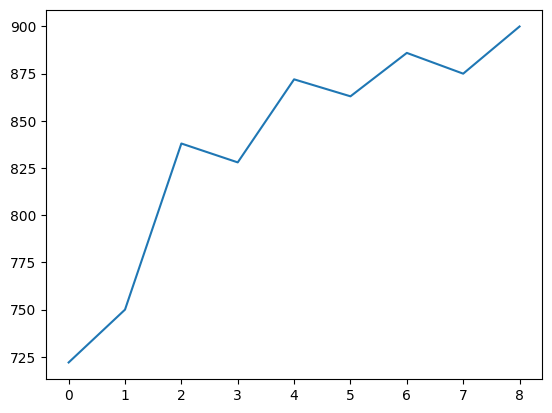

In [ ]:
predicted_correct = []#A
for i in range(1,10):#B
    model = PCA(n_components = i)#C
    results = model.fit(X)#D
    Z = results.transform(X) #E
    fit = gnb.fit(Z,y) #F
    pred = fit.predict(Z)#G
    predicted_correct.append(confusion_matrix(pred,y).trace())#H
    print (predicted_correct) #I
plt.plot(predicted_correct) #J
plt.show()#K

# Классификация ирисов

In [17]:
import sklearn as sklearn
from sklearn import cluster
import pandas as pd

url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
X = pd.read_csv(url, sep=',')  #B
X = X[[u'sepal.length', u'sepal.width', u'petal.length', u'petal.width']]
print(X[:5]) #C
model   = cluster.KMeans(n_clusters=3, random_state=25)  #D
results = model.fit(X) #E
X["cluster"] = results.predict(X) #F
X["c"] = "lookatmeIamimportant" #H
print (X[:5]) #I
classification_result = X[["cluster","c"]].groupby(["cluster"]).agg("count")  #J
print(classification_result)#K

   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   sepal.length  sepal.width  petal.length  petal.width  cluster  \
0           5.1          3.5           1.4          0.2        1   
1           4.9          3.0           1.4          0.2        1   
2           4.7          3.2           1.3          0.2        1   
3           4.6          3.1           1.5          0.2        1   
4           5.0          3.6           1.4          0.2        1   

                      c  
0  lookatmeIamimportant  
1  lookatmeIamimportant  
2  lookatmeIamimportant  
3  lookatmeIamimportant  
4  lookatmeIamimportant  
          c
cluster    
0        38
1        50
2        62
